#### Import necessary libraries for data manipulation, numerical operations, and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the customer data from a CSV file

In [2]:
cust_df = pd.read_csv('Customer.csv')

In [3]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Display the number of missing values for each column

In [4]:
print(f"Missing values in each variable: \n{cust_df.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Drop the 'CustomerID' column as it is not relevant for clustering

In [5]:
df = cust_df.drop('CustomerID', axis = 1)

#### Import LabelEncoder for encoding categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Remove rows with missing values
df = df.dropna()

# Encode the 'Gender' column into numerical format (Male -> 1, Female -> 0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

#### Display the count of missing values again to confirm all are removed

In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Display the shape (number of rows and columns) of the dataset

In [9]:
df.shape

(200, 4)

#### Show basic statistics for numerical columns in the dataset

In [10]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


#### Display the first few rows of the dataset

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### Extract the columns relevant for clustering


In [12]:
clus_dataset = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clus_dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Import seaborn for advanced data visualization


In [13]:
import seaborn as sns

#### Identify non-binary columns for pairplot visualization

In [14]:
non_boolean=[col for col in df.columns if len(df[col].drop_duplicates())>2]

#### Create a pairplot to visualize relationships between variables


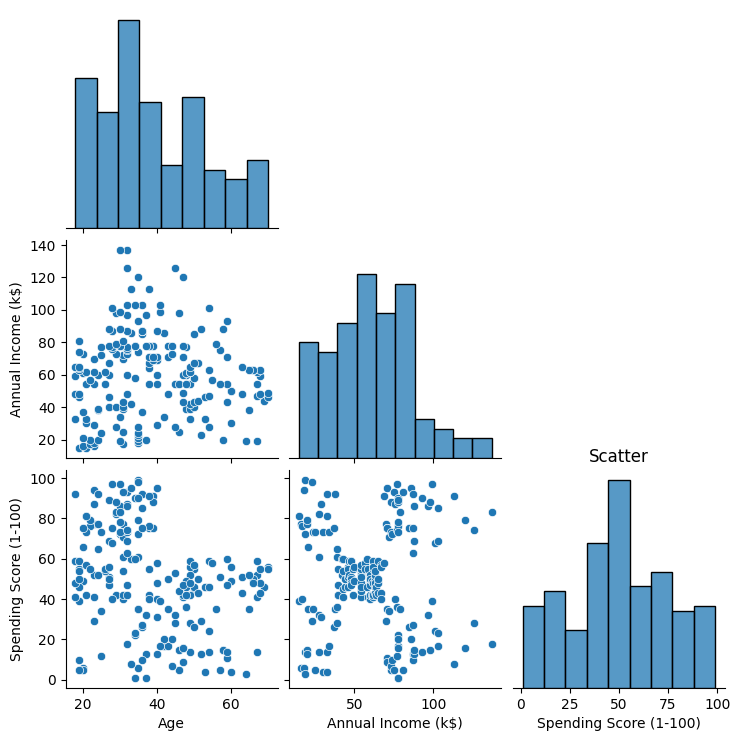

In [15]:
sns.pairplot(data=clus_dataset[non_boolean], corner=True)
plt.title('Scatter')
plt.show()

#### Import the KMeans clustering algorithm


In [16]:
from sklearn.cluster import KMeans

#### Initialize an empty list to store within-cluster sum of squares (WCSS)


In [17]:
wcss = []

#### Calculate WCSS for different numbers of clusters (1 to 10)


In [18]:
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(clus_dataset)
    wcss.append(km.inertia_)

#### Plot the WCSS to identify the optimal number of clusters (Elbow Method)

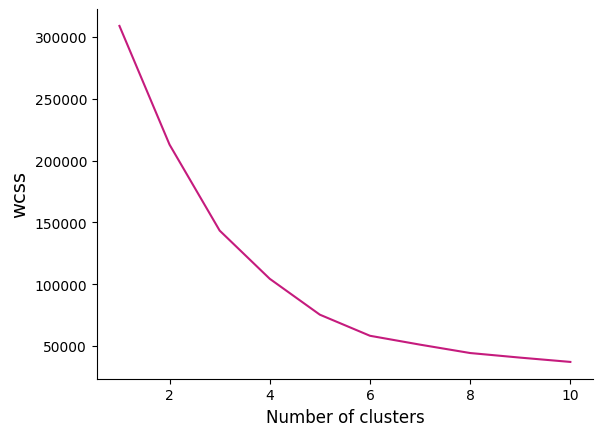

In [19]:
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

#### Fit the KMeans model with 5 clusters


In [20]:
k_means = KMeans(n_clusters= 5, init='k-means++')
y_kmeans = k_means.fit_predict(clus_dataset)
y_kmeans

C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### Retrieve the labels assigned to each data point


In [21]:
labels = k_means.labels_
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### Add cluster labels to the original dataframe


In [22]:
df['Clus_km'] = labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


#### Calculate the mean of each feature for each cluster


In [23]:
df.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,0.417722,43.088608,55.291139,49.569620
1,0.527778,40.666667,87.750000,17.583333
2,0.461538,32.692308,86.538462,82.128205
3,0.391304,45.217391,26.304348,20.913043
4,0.391304,25.521739,26.304348,78.565217


#### Plot the clusters based on Annual Income and Spending Score


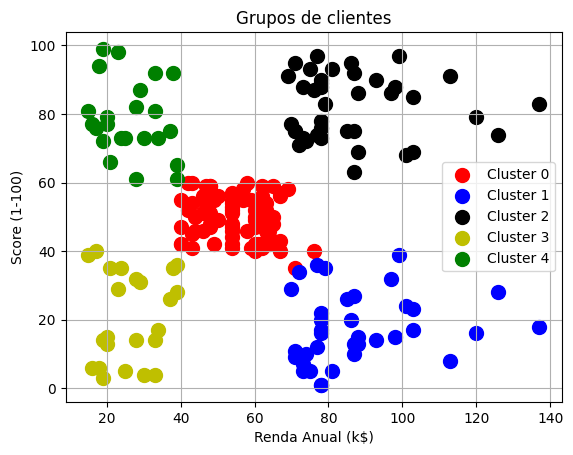

In [24]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = clus_dataset[y_kmeans == k]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s = 100, c = cores[k], label = f'Cluster {k}')


plt.title('Grupos de clientes')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()

#### Plot the clusters based on Age and Annual Income

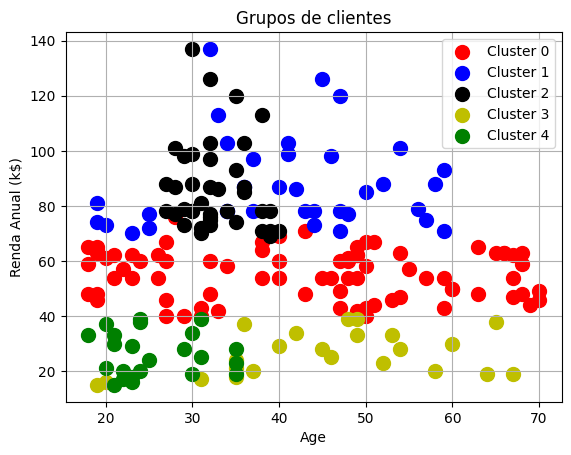

In [25]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = clus_dataset[y_kmeans == k]
    plt.scatter(cluster['Age'], cluster['Annual Income (k$)'],
                s=100, c=cores[k], label=f'Cluster {k}')

plt.title('Grupos de clientes')
plt.xlabel('Age')
plt.ylabel('Renda Anual (k$)')
plt.grid()
plt.legend()
plt.show()

#### Plot the clusters based on Age and Spending Score

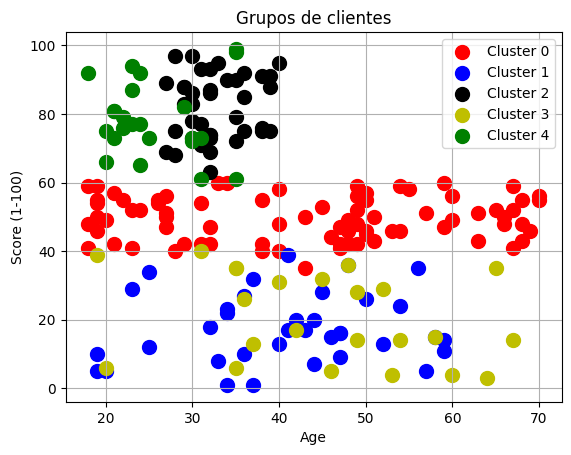

In [26]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']
for k in range(k_grupos):
    cluster = clus_dataset[y_kmeans == k]
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'],
                s=100, c=cores[k], label=f'Cluster {k}')

plt.title('Grupos de clientes')
plt.xlabel('Age')
plt.ylabel('Score (1-100)')
plt.grid()
plt.legend()
plt.show()

#### Import 3D plotting library for advanced visualization

In [27]:
from mpl_toolkits.mplot3d import Axes3D

#### 3D visualization of clusters based on Age, Annual Income, and Spending Score

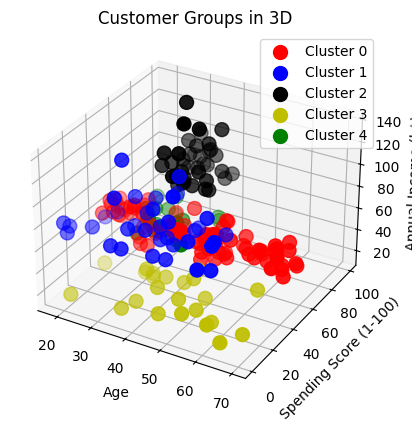

In [28]:
k_grupos = 5
cores = ['r', 'b', 'k', 'y', 'g']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for k in range(k_grupos):
    cluster = clus_dataset[y_kmeans == k]
    ax.scatter(cluster['Age'], cluster['Spending Score (1-100)'], cluster['Annual Income (k$)'],
                s=100, c=cores[k], label=f'Cluster {k}')

# Set axis labels and plot title
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('Customer Groups in 3D')

plt.legend()
plt.show()
